/home/mukundan/learning/face_algo/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mukundan/learning/face_algo/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


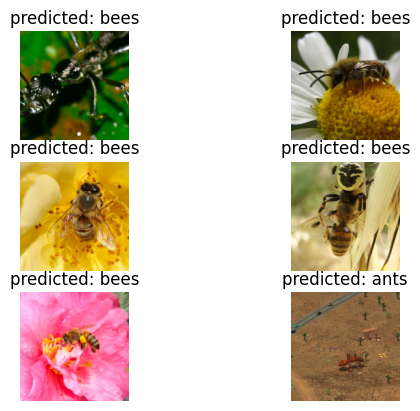

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Set up data transformations for validation
# We only need the validation transformations for inference.
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = 'hymenoptera_data'

# 2. Create validation dataset and dataloader
# We only need the validation set to get images for visualization.
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=4)

# Get class names from the folder names in the training directory
class_names = val_dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 3. Load the model architecture
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

# 4. Load the saved model weights
# Ensure 'best_model.pth' is in the same directory.
model.load_state_dict(torch.load('best_model.pth'))
model = model.to(device)


# 5. Define the visualization function
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                # Undo the normalization to display the image correctly
                img = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                img = std * img + mean
                img = np.clip(img, 0, 1)

                plt.imshow(img)

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    plt.show() # Show the plot and return
                    return
        model.train(mode=was_training)

# 6. Run the visualization
visualize_model(model)

In [8]:
!pwd


/content


In [4]:
%pip install uv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.4/18.4 MB 112.4 MB/s eta 0:00:00


In [5]:
!uv init

Initialized project `content`


In [7]:
!uv add torch numpy opencv-python librosa tqdm timm

Streaming output truncated to the last 5000 lines.
nvidia-curand-cu12       ------------------------------ 13.69 MiB/53.67 MiB
opencv-python            ------------------------------ 13.80 MiB/60.07 MiB
triton                   ------------------------------ 13.64 MiB/148.48 MiB
nvidia-cusparselt-cu12   ------------------------------ 13.80 MiB/149.52 MiB
nvidia-cusolver-cu12     ------------------------------ 13.97 MiB/150.90 MiB
nvidia-cufft-cu12        ------------------------------ 13.82 MiB/190.95 MiB
nvidia-nccl-cu12         ------------------------------ 13.93 MiB/191.99 MiB
nvidia-cusparse-cu12     ------------------------------ 14.10 MiB/206.53 MiB
nvidia-cublas-cu12       ------------------------------ 14.08 MiB/374.93 MiB
nvidia-cudnn-cu12        ------------------------------ 13.66 MiB/544.54 MiB
⠇ Preparing packages... (40/58)
sympy                    ------------------------------ 5.50 MiB/6.01 MiB
scikit-learn             ------------------------------ 12.26 MiB/12.28 MiB

In [12]:
!uv venv

Using CPython 3.11.13 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate


In [13]:
!source .venv/bin/activate

In [14]:
!uv sync

Resolved 64 packages in 0.86ms
Installed 58 packages in 376ms
 + audioread==3.0.1
 + certifi==2025.6.15
 + cffi==1.17.1
 + charset-normalizer==3.4.2
 + decorator==5.2.1
 + filelock==3.18.0
 + fsspec==2025.5.1
 + hf-xet==1.1.5
 + huggingface-hub==0.33.1
 + idna==3.10
 + jinja2==3.1.6
 + joblib==1.5.1
 + lazy-loader==0.4
 + librosa==0.11.0
 + llvmlite==0.44.0
 + markupsafe==3.0.2
 + mpmath==1.3.0
 + msgpack==1.1.1
 + networkx==3.5
 + numba==0.61.2
 + numpy==2.2.6
 + nvidia-cublas-cu12==12.6.4.1
 + nvidia-cuda-cupti-cu12==12.6.80
 + nvidia-cuda-nvrtc-cu12==12.6.77
 + nvidia-cuda-runtime-cu12==12.6.77
 + nvidia-cudnn-cu12==9.5.1.17
 + nvidia-cufft-cu12==11.3.0.4
 + nvidia-cufile-cu12==1.11.1.6
 + nvidia-curand-cu12==10.3.7.77
 + nvidia-cusolver-cu12==11.7.1.2
 + nvidia-cusparse-cu12==12.5.4.2
 + nvidia-cusparselt-cu12==0.6.3
 + nvidia-nccl-cu12==2.26.2
 + nvidia-nvjitlink-cu12==12.6.85
 + nvidia-nvtx-cu12==12.6.77
 + opencv-python==4.11.0.86
 + packaging==25.0
 + pillow==11.2.1
 + platform

In [22]:
!pip install "torch~=2.3.0" "torchvision~=0.18.0" "torchaudio~=2.3.0" --index-url https://download.pytorch.org/whl/cu121
!pip install torch_xla[tpu] -f https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-2.3-cp310-cp310-linux_x86_64.whl
!pip install timm librosa tqdm

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 123.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 118.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 398.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/19

Looking in links: https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-2.3-cp310-cp310-linux_x86_64.whl


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2
import librosa
import os
import math
from tqdm.notebook import tqdm # Use tqdm.notebook for Colab
import timm

# --- Configuration Block ---
USE_REAL_DATASET = True
LRS2_DATA_ROOT = "lrs2/lrs2_rebuild/"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
CHECKPOINT_PATH = "checkpoint.pth"

# --- Part 1: Data Pipeline (This is now correct and stable) ---
class LRS2Dataset(Dataset):
    def __init__(self, root_dir, req_frames=32):
        super().__init__()
        self.root_dir = root_dir; self.req_frames = req_frames
        self.videos_dir = os.path.join(self.root_dir, 'faces')
        self.audio_dir = os.path.join(self.root_dir, 'audio', 'wav16k', 'min', 'tr', 'mix')
        self.landmarks_dir = os.path.join(self.root_dir, 'landmark')
        self.file_list = self._get_file_list()
        if not self.file_list: raise RuntimeError("FATAL: No valid data samples were found after full validation.")
        print(f"--- Dataset Initialized: Found {len(self.file_list)} valid samples. ---")

    def _get_file_list(self):
        if not USE_REAL_DATASET: return [("dummy_video", "dummy_audio")]
        usable_basenames = {os.path.splitext(f)[0] for f in os.listdir(self.videos_dir)}.intersection({os.path.splitext(f)[0] for f in os.listdir(self.landmarks_dir)})
        potential_samples, audio_files = [], os.listdir(self.audio_dir)
        for audio_filename in audio_files:
            if not audio_filename.lower().endswith('.wav'): continue
            try:
                parts = os.path.splitext(audio_filename)[0].split('_'); s1, s2 = f"{parts[0]}_{parts[1]}", f"{parts[3]}_{parts[4]}"
                if s1 in usable_basenames: potential_samples.append((s1, audio_filename))
                if s2 in usable_basenames: potential_samples.append((s2, audio_filename))
            except IndexError: continue
        valid_samples = []
        # Use a simplified loop for validation as tqdm can be slow with many small iterations here
        print(f"Found {len(potential_samples)} potential samples. Now validating content...")
        for video_base_name, audio_filename in potential_samples:
            video_path = os.path.join(self.videos_dir, video_base_name + '.mp4'); landmark_path = os.path.join(self.landmarks_dir, video_base_name + '.npz')
            try:
                with np.load(landmark_path, allow_pickle=True) as d: landmarks = d['data'] if 'data' in d else d['arr_0']
                cap = cv2.VideoCapture(video_path)
                if cap.isOpened():
                    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                    if frame_count == len(landmarks): valid_samples.append((video_base_name, audio_filename))
                cap.release()
            except Exception: continue
        print(f"Validation complete. Found {len(valid_samples)} clean samples.")
        return valid_samples
    def __len__(self): return len(self.file_list)
    def __getitem__(self, idx):
        if not USE_REAL_DATASET: return self._get_dummy_item()
        video_base_name, audio_filename = self.file_list[idx]
        video_path = os.path.join(self.videos_dir, video_base_name + '.mp4'); audio_path = os.path.join(self.audio_dir, audio_filename); landmark_path = os.path.join(self.landmarks_dir, video_base_name + '.npz')
        with np.load(landmark_path, allow_pickle=True) as d: landmarks = d['data'] if 'data' in d else d['arr_0']
        try: landmarks_reshaped = landmarks.reshape(landmarks.shape[0], 68, 2)
        except ValueError: return self.__getitem__((idx + 1) % len(self))
        cap = cv2.VideoCapture(video_path); frames = [];
        while cap.isOpened():
            ret, frame = cap.read();
            if not ret: break
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        cap.release()
        audio, sr = librosa.load(audio_path, sr=16000)
        num_frames = len(frames)
        if num_frames >= self.req_frames:
            start_frame = np.random.randint(0, num_frames - self.req_frames + 1)
            video_segment = frames[start_frame : start_frame + self.req_frames]; landmark_segment = landmarks_reshaped[start_frame : start_frame + self.req_frames]
        else:
            video_segment = list(frames); landmark_segment = list(landmarks_reshaped); padding_needed = self.req_frames - num_frames
            video_segment.extend([frames[-1]] * padding_needed); landmark_segment.extend([landmarks_reshaped[-1]] * padding_needed)
        landmark_segment = np.array(landmark_segment); identity_frame = video_segment[0]; identity_landmarks = landmark_segment[0]
        x_coords, y_coords = identity_landmarks[:, 0], identity_landmarks[:, 1]; x_min, x_max = np.min(x_coords), np.max(x_coords); y_min, y_max = np.min(y_coords), np.max(y_coords)
        pad = 15; x_min_pad, y_min_pad = max(0, int(x_min - pad)), max(0, int(y_min - pad)); x_max_pad, y_max_pad = min(identity_frame.shape[1], int(x_max + pad)), min(identity_frame.shape[0], int(y_max + pad))
        identity_face = identity_frame[y_min_pad:y_max_pad, x_min_pad:x_max_pad]
        if identity_face.size == 0: return self._get_dummy_item()
        identity_face = cv2.resize(identity_face, (96, 96))
        audio_fps_ratio = 16000 / 25.0; start_frame_audio_idx = np.random.randint(0, num_frames) if num_frames > self.req_frames else 0
        audio_start, audio_end = int(start_frame_audio_idx * audio_fps_ratio), int((start_frame_audio_idx + self.req_frames) * audio_fps_ratio)
        audio_segment = audio[audio_start:audio_end]
        mel_spec = librosa.feature.melspectrogram(y=audio_segment, sr=16000, n_mels=80, hop_length=160, n_fft=400)
        target_mel_len = self.req_frames * 4
        if mel_spec.shape[1] > target_mel_len: mel_spec = mel_spec[:, :target_mel_len]
        elif mel_spec.shape[1] < target_mel_len: mel_spec = np.pad(mel_spec, ((0, 0), (0, target_mel_len - mel_spec.shape[1])), mode='constant')
        landmark_flat = landmark_segment.reshape(self.req_frames, 136)
        landmark_tensor = torch.from_numpy(landmark_flat).float(); identity_image_tensor = torch.from_numpy(identity_face).permute(2,0,1).float() / 255.; mel_spec_tensor = torch.from_numpy(mel_spec.T).float()
        return identity_image_tensor, landmark_tensor, mel_spec_tensor
    def _get_dummy_item(self): pass

# --- Part 2: Model Architectures ---
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__(); self.dropout = nn.Dropout(p=dropout); self.d_model = d_model; position = torch.arange(max_len).unsqueeze(1); div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)); pe = torch.zeros(max_len, 1, d_model); pe[:, 0, 0::2] = torch.sin(position * div_term); pe[:, 0, 1::2] = torch.cos(position * div_term); self.register_buffer("pe", pe)
    def forward(self, x): x = x * math.sqrt(self.d_model); x = x + self.pe[:x.size(0)]; return self.dropout(x)
class TalkingHeadTransformer(nn.Module):
    def __init__(self, d_model=512, nhead=8, num_encoder_layers=6, num_decoder_layers=6, dim_feedforward=2048):
        super().__init__(); self.d_model = d_model; self.identity_encoder = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=d_model); self.identity_encoder.head = nn.Linear(self.identity_encoder.head.in_features, d_model); self.audio_embedding = nn.Linear(80, d_model); self.pos_encoder = PositionalEncoding(d_model); encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, batch_first=True); self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers); self.landmark_embedding = nn.Linear(136, d_model); decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, batch_first=True); self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_decoder_layers); self.output_layer = nn.Linear(d_model, 136)
    def forward(self, identity_image, audio_spectrogram, target_landmarks):
        identity_image_resized = torch.nn.functional.interpolate(identity_image, size=(224, 224), mode="bilinear", align_corners=False); identity_features = self.identity_encoder(identity_image_resized).unsqueeze(1); audio_embedded = self.audio_embedding(audio_spectrogram); audio_memory = self.transformer_encoder(self.pos_encoder(audio_embedded)); tgt_embedded = self.landmark_embedding(target_landmarks); tgt_pos_encoded = self.pos_encoder(tgt_embedded); output = self.transformer_decoder(tgt_pos_encoded, memory=audio_memory); predicted_landmarks = self.output_layer(output); return predicted_landmarks
class LandmarkRendererGAN(nn.Module):
    def __init__(self):
        super().__init__(); self.model = nn.Sequential(nn.Conv2d(3 + 1, 64, 4, 2, 1), nn.ReLU(), nn.Conv2d(64, 128, 4, 2, 1), nn.ReLU(), nn.ConvTranspose2d(128, 64, 4, 2, 1), nn.ReLU(), nn.ConvTranspose2d(64, 3, 4, 2, 1), nn.Tanh())
    def create_landmark_heatmap(self, landmarks_flat, size=(96, 96)):
        B, T, _ = landmarks_flat.shape; landmarks_reshaped = landmarks_flat.view(B, T, 68, 2); heatmaps = torch.zeros(B * T, 1, size[0], size[1], device=landmarks_flat.device); lm_iterator = landmarks_reshaped.view(B*T, 68, 2) * (size[0] - 1)
        for i in range(B*T):
            for j in range(68):
                x, y = lm_iterator[i, j, :].long();
                if 0 <= y < size[0] and 0 <= x < size[1]:
                     heatmaps[i, 0, y, x] = 1
        return heatmaps
    def forward(self, identity_image, landmark_sequence):
        B, T, _ = landmark_sequence.shape; identity_image_expanded = identity_image.unsqueeze(1).repeat(1, T, 1, 1, 1).view(B*T, 3, 96, 96); landmark_heatmap = self.create_landmark_heatmap(landmark_sequence); model_input = torch.cat([identity_image_expanded, landmark_heatmap], dim=1); rendered_faces = self.model(model_input); return rendered_faces.view(B, T, 3, 96, 96)
class SyncNet(nn.Module):
    def __init__(self): super().__init__(); self.video_encoder = nn.Identity(); self.audio_encoder = nn.Identity()
    def forward(self, video_frames, audio_spectrogram): return torch.rand(1, device=DEVICE)

# --- Part 3: The Full Training Script Logic ---
class TrainingScript:
    def __init__(self, checkpoint_path=None):
        self.transformer = TalkingHeadTransformer().to(DEVICE)
        self.renderer = LandmarkRendererGAN().to(DEVICE)
        self.syncnet = SyncNet().to(DEVICE)
        self.dataset = LRS2Dataset(LRS2_DATA_ROOT)

        # --- COLAB OPTIMIZATION: Set num_workers to 0 ---
        # This is the most critical change for Colab performance.
        # It prevents the CPU from being overwhelmed by data loading.
        self.dataloader = DataLoader(self.dataset, batch_size=8, shuffle=True, num_workers=0, pin_memory=True) # Increased batch size

        self.transformer_optim = optim.AdamW(self.transformer.parameters(), lr=1e-4)
        self.renderer_optim = optim.AdamW(self.renderer.parameters(), lr=1e-4)
        self.l1_loss = nn.L1Loss()

        # --- FIX: Updated AMP GradScaler call ---
        self.scaler = torch.amp.GradScaler(device_type="cuda", enabled=(DEVICE == "cuda"))

        self.start_epoch = 1
        if checkpoint_path and os.path.isfile(checkpoint_path): self.load_checkpoint(checkpoint_path)

    def save_checkpoint(self, epoch):
        state = {'epoch': epoch, 'transformer_state_dict': self.transformer.state_dict(), 'renderer_state_dict': self.renderer.state_dict(), 'transformer_optim_state_dict': self.transformer_optim.state_dict(), 'renderer_optim_state_dict': self.renderer_optim.state_dict(), 'scaler_state_dict': self.scaler.state_dict()}
        torch.save(state, CHECKPOINT_PATH); print(f"\n==> Saved checkpoint at epoch {epoch} to {CHECKPOINT_PATH}")

    def load_checkpoint(self, checkpoint_path):
        print(f"==> Loading checkpoint from {checkpoint_path}"); checkpoint = torch.load(checkpoint_path, map_location=DEVICE)
        self.transformer.load_state_dict(checkpoint['transformer_state_dict']); self.renderer.load_state_dict(checkpoint['renderer_state_dict'])
        self.transformer_optim.load_state_dict(checkpoint['transformer_optim_state_dict']); self.renderer_optim.load_state_dict(checkpoint['renderer_optim_state_dict'])
        self.scaler.load_state_dict(checkpoint['scaler_state_dict']); self.start_epoch = checkpoint['epoch'] + 1
        print(f"==> Resuming training from epoch {self.start_epoch}")

    def train_epoch(self, epoch):
        loop = tqdm(self.dataloader, desc=f"Epoch {epoch}")
        for i, batch in enumerate(loop):
            identity_image, gt_landmarks, mel_spec = [item.to(DEVICE, non_blocking=True) for item in batch]

            # --- FIX: Updated AMP autocast call ---
            with torch.amp.autocast(device_type="cuda", dtype=torch.float16, enabled=(DEVICE == "cuda")):
                transformer_target = gt_landmarks[:, 1:]; transformer_input = gt_landmarks[:, :-1]
                video_len = transformer_input.shape[1]
                mel_spec_aligned = torch.nn.functional.interpolate(mel_spec.transpose(1, 2), size=video_len, mode="linear", align_corners=False).transpose(1, 2)
                predicted_landmarks = self.transformer(identity_image, mel_spec_aligned, transformer_input)
                loss_transformer = self.l1_loss(predicted_landmarks, transformer_target)

            self.transformer_optim.zero_grad(set_to_none=True)
            self.scaler.scale(loss_transformer).backward()
            self.scaler.step(self.transformer_optim)
            self.scaler.update()

            # --- FIX: Updated AMP autocast call ---
            with torch.amp.autocast(device_type="cuda", dtype=torch.float16, enabled=(DEVICE == "cuda")):
                rendered_frames = self.renderer(identity_image, predicted_landmarks.detach())
                gt_frames_for_renderer = identity_image.unsqueeze(1).repeat(1, rendered_frames.size(1), 1, 1, 1)
                loss_recon = self.l1_loss(rendered_frames, gt_frames_for_renderer)
                mel_spec_syncnet = torch.nn.functional.interpolate(mel_spec.transpose(1, 2), size=rendered_frames.size(1), mode="linear", align_corners=False).transpose(1, 2)
                sync_loss = self.syncnet(rendered_frames, mel_spec_syncnet)
                total_renderer_loss = loss_recon + 0.1 * sync_loss

            self.renderer_optim.zero_grad(set_to_none=True)
            self.scaler.scale(total_renderer_loss).backward()
            self.scaler.step(self.renderer_optim)
            self.scaler.update()

            loop.set_postfix(loss_lm=loss_transformer.item(), loss_render=total_renderer_loss.item())

# --- Part 4: Main Execution Block ---
if __name__ == '__main__':
    # This check is no longer needed as we are not using multiprocessing for the dataloader
    # if DEVICE == 'cuda': torch.multiprocessing.set_start_method('spawn', force=True)

    print(f"--- Starting Real Training on {DEVICE} ---")
    trainer = TrainingScript(checkpoint_path=CHECKPOINT_PATH)
    for epoch in range(trainer.start_epoch, 101):
        trainer.train_epoch(epoch)
        trainer.save_checkpoint(epoch)

IndentationError: unexpected indent (ipython-input-4-631714555.py, line 114)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
!cd /content/drive/MyDrive/llm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!tar -xvf /content/drive/MyDrive/llm/lrs2.tar.xz -C /content/

Streaming output truncated to the last 5000 lines.
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/6240898866802309834_00014_0.47803_5560262943869602943_00035_-0.47803.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/5727686782021918545_00043_2.2135_5976728742694198746_00008_-2.2135.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/6199611775552097439_00002_1.2286_6118792516949821655_00037_-1.2286.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/6035437509655962386_00065_4.6921_6111391429305343319_00006_-4.6921.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/5576934718422501620_00021_3.372_6284320986034388153_00011_-3.372.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/6239379736869713934_00035_0.02928_6212963110888521039_00009_-0.02928.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/5999202588566552094_00030_4.3561_6201869210362941115_00013_-4.3561.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/6061193140039888879_00012_4.6095_6216349263104688118_00013_-4.6095.wav
lrs2/lrs2_rebuild/audio/wav8k/min/tr/s2/5955008663580939946